<a href="https://colab.research.google.com/github/Achiever-caleb/Sleep_Quality_Prediction/blob/main/Sleep_Quality_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [ ]:
sl_df= pd.read_csv("/content/sleep_deprivation_dataset_detailed.csv")
sl_df.head()

,Participant_ID,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,Gender,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level
0,P1,5.25,15,12,1.60,64.20,12,365.85,35,Female,30.53,2,1,33
1,P2,8.70,12,14,2.54,65.27,21,288.95,20,Male,27.28,3,8,37
2,P3,7.39,17,10,3.40,74.28,35,325.93,18,Male,30.00,1,2,32
3,P4,6.59,14,3,3.54,72.42,25,276.86,18,Male,34.47,5,0,23
4,P5,3.94,20,12,3.09,99.72,60,383.45,36,Male,29.70,3,4,14


In [ ]:
sl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Participant_ID             60 non-null     object 
 1   Sleep_Hours                60 non-null     float64
 2   Sleep_Quality_Score        60 non-null     int64  
 3   Daytime_Sleepiness         60 non-null     int64  
 4   Stroop_Task_Reaction_Time  60 non-null     float64
 5   N_Back_Accuracy            60 non-null     float64
 6   Emotion_Regulation_Score   60 non-null     int64  
 7   PVT_Reaction_Time          60 non-null     float64
 8   Age                        60 non-null     int64  
 9   Gender                     60 non-null     object 
 10  BMI                        60 non-null     float64
 11  Caffeine_Intake            60 non-null     int64  
 12  Physical_Activity_Level    60 non-null     int64  
 13  Stress_Level               60 non-null     int64  
d

In [ ]:
sl_df.describe(include = "all")

,Participant_ID,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,Gender,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level
count,60,60.000000,60.000000,60.000000,60.000000,60.000000,60.0000,60.000000,60.000000,60,60.000000,60.000000,60.000000,60.000000
unique,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
top,P1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,NaN,NaN,NaN,NaN
mean,NaN,5.805500,8.316667,12.000000,3.245000,75.005833,38.1500,332.539000,29.516667,NaN,27.329333,2.383333,4.116667,17.866667
std,NaN,1.832357,5.637320,7.577845,0.827368,13.671457,17.1334,87.800288,8.168753,NaN,4.541382,1.688362,3.108717,11.015346
min,NaN,3.120000,0.000000,0.000000,1.600000,50.900000,10.0000,201.560000,18.000000,NaN,18.740000,0.000000,0.000000,0.000000
25%,NaN,4.107500,4.000000,6.000000,2.595000,64.620000,25.0000,257.535000,21.750000,NaN,23.580000,1.000000,1.000000,8.750000
50%,NaN,5.690000,8.000000,11.500000,3.260000,74.270000,37.0000,327.210000,28.500000,NaN,27.365000,2.500000,4.000000,17.500000
75%,NaN,7.285000,13.000000,19.000000,3.965000,85.600000,54.2500,402.845000,36.000000,NaN,30.747500,4.000000,6.000000,26.250000


## Data Cleaning

In [ ]:
unwanted_columns= ["Participant_ID"]
sl_df_new=[col for col in sl_df.columns if col not in unwanted_columns]

In [ ]:
sl_df_clean = pd.DataFrame(sl_df[sl_df_new])
sl_df_clean.head()

,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,Gender,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level
0,5.25,15,12,1.60,64.20,12,365.85,35,Female,30.53,2,1,33
1,8.70,12,14,2.54,65.27,21,288.95,20,Male,27.28,3,8,37
2,7.39,17,10,3.40,74.28,35,325.93,18,Male,30.00,1,2,32
3,6.59,14,3,3.54,72.42,25,276.86,18,Male,34.47,5,0,23
4,3.94,20,12,3.09,99.72,60,383.45,36,Male,29.70,3,4,14


In [ ]:
sl_df_clean.isnull().sum()

,0
Sleep_Hours,0
Sleep_Quality_Score,0
Daytime_Sleepiness,0
Stroop_Task_Reaction_Time,0
N_Back_Accuracy,0
Emotion_Regulation_Score,0
PVT_Reaction_Time,0
Age,0
Gender,0
BMI,0


## Data Visualization

In [ ]:
corr=sl_df_clean.select_dtypes(include="number").corr()

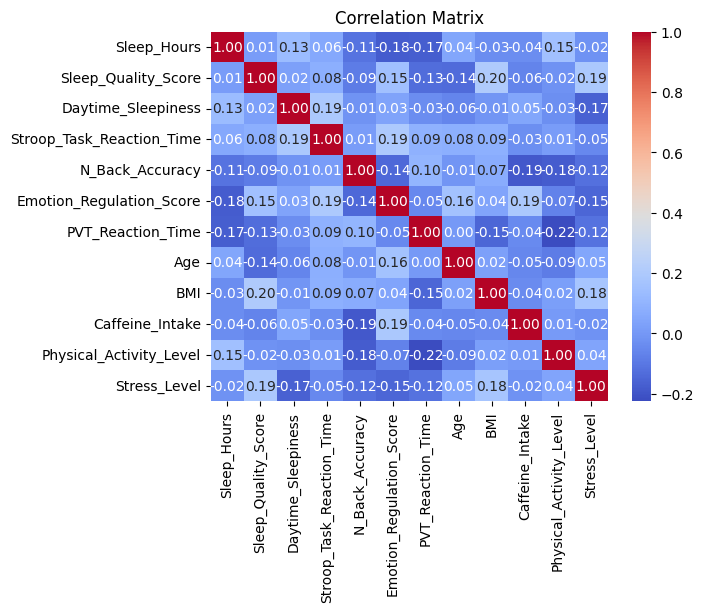

In [ ]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Data Preprocessing

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(sl_df_clean[['Gender']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Gender']))
encoded_df.head()

,Gender_Male
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0


In [ ]:
df_encoded= pd.concat([sl_df_clean, encoded_df], axis=1)
df_encoded.drop('Gender', axis=1, inplace=True)
df_encoded.head()

,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level,Gender_Male
0,5.25,15,12,1.60,64.20,12,365.85,35,30.53,2,1,33,0.0
1,8.70,12,14,2.54,65.27,21,288.95,20,27.28,3,8,37,1.0
2,7.39,17,10,3.40,74.28,35,325.93,18,30.00,1,2,32,1.0
3,6.59,14,3,3.54,72.42,25,276.86,18,34.47,5,0,23,1.0
4,3.94,20,12,3.09,99.72,60,383.45,36,29.70,3,4,14,1.0


In [ ]:
y= df_encoded["Sleep_Quality_Score"]
X= df_encoded.drop("Sleep_Quality_Score", axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Text(0, 0.5, 'Cumulative explained variance')

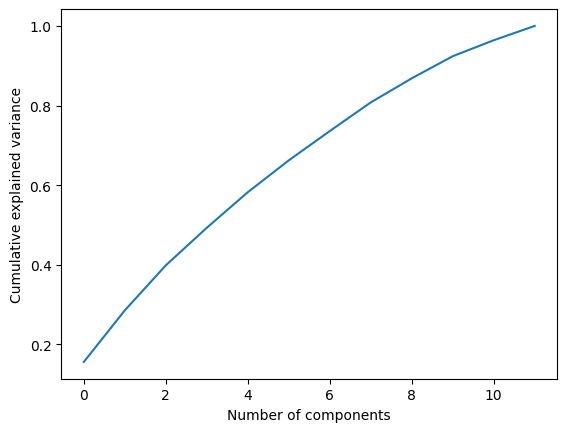

In [ ]:
# define PCA object
pca = PCA()

# fit the PCA model to our data and apply the dimensionality reduction
X_train_new = pca.fit_transform(X_train_scaled)

# create a dataframe containing the principal components
pca_df = pd.DataFrame(data = X_train_new)

# plot line graph of cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
pca.explained_variance_ratio_.sum()

1.0000000000000002

In [ ]:
X_test_new = pca.transform(X_test_scaled)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
# instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 101)

# train the model on training data
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=1000, random_state=101)

In [40]:
# use the forest's predict method on the test data
predictions = rf.predict(X_test_scaled)

# calculate the absolute errors
errors_reg = abs(predictions - y_test)

print("MAE: ", mean_squared_error(y_test, predictions))
print("R2: " ,r2_score(y_test, predictions))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, predictions)))


MAE:  18.747632916666667
R2:  0.13776456723091646
RMSE:  4.329853683055198
